Missing values per column:
id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                      

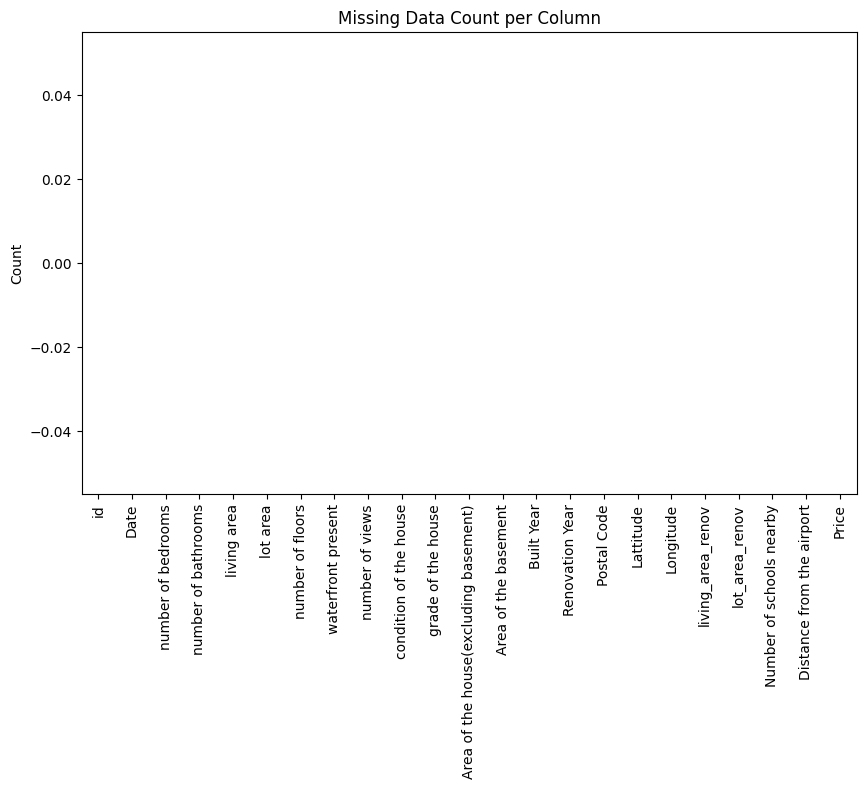

Missing values after cleaning: 0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset [cite: 12]
df = pd.read_csv('../datasets/Hospital Price India.csv')

# 2. Identify missing values [cite: 12]
print("Missing values per column:")
print(df.isnull().sum())

# 3. Visualize missing data patterns [cite: 13]
plt.figure(figsize=(10, 6))
df.isnull().sum().plot(kind='bar')
plt.title('Missing Data Count per Column')
plt.ylabel('Count')
plt.show()

# 4. Remove columns with extremely high missing values (>50%) [cite: 16]
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# 5. Apply mean/median imputation for numerical columns [cite: 14]
# Identifying numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    # Use median if there are outliers, otherwise mean
    df[col] = df[col].fillna(df[col].median())

# 6. Apply mode imputation for categorical columns [cite: 15]
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 7. Validate dataset after cleaning [cite: 17]
print("Missing values after cleaning:", df.isnull().sum().sum())

# 8. Save cleaned dataset [cite: 20]
df.to_csv('../datasets/Cleaned_Hospital_Price.csv', index=False)